In [12]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../../designer/')
sys.path.append('./../../')


import numpy as np
import matplotlib.pyplot as plt
import copy

from film import TwoMaterialFilm
from spectrum import Spectrum
from design import DesignForSpecSimple
from optimizer.needle_insert import make_test_insert_film, get_insert_grad

def plot_insert_gradient(film, target_reflect_spec, search_pts=200, test=False):
    film_insert = copy.deepcopy(film)
    if test:
        insert_idx = make_test_insert_film(film_insert, search_pts)
        grad = get_insert_grad(film_insert, [target_reflect_spec])

    film_before = copy.deepcopy(film)
    film_before_insert = copy.deepcopy(film_insert)

    design = DesignForSpecSimple([target_reflect_spec], film)
    design.adam_gd(1000, alpha=0.1)
    print(film.get_d())
    film.remove_negative_thickness_layer()
    film_insert = copy.deepcopy(film)

    return film_before, film_before_insert, film, film_insert

wls = np.linspace(500, 1000, 500)
target_reflect_spec = Spectrum(0., wls, np.ones(wls.shape[0], dtype='float'))

# d = np.array([2000])
# film = TwoMaterialFilm('TiO2', 'SiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([2000])
# film = TwoMaterialFilm('SiO2', 'TiO2', 'TiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([2000])
# film = TwoMaterialFilm('SiO2', 'TiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([600, 600, 600])
# film = TwoMaterialFilm('TiO2', 'SiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

d = np.array([100.] * 50)
film = TwoMaterialFilm('SiO2', 'TiO2', 'SiO2', d)
films = plot_insert_gradient(film, target_reflect_spec, test=False)

# conclusion: big insertion gradeint ON THE INTERFACE. in the middle, should be some

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1000/1000 [00:33<00:00, 29.52it/s]

[111.56570516  82.14395311  86.02697726  87.45575863 108.70435574
  83.84886335 112.41983593 115.92756741 116.43085441 122.92581678
 110.16008427  80.75688534  85.668077    90.1961384   83.87465578
  79.73441886  89.68275267 106.68968193  94.29937721  76.99441699
 108.99483725 128.05445919 120.51640154  99.4401314  106.87115948
 106.28528342  99.23434609  78.20296147  86.44496891  84.34092289
 106.0821496  115.4635559   95.39465904  76.63050992 101.03569789
 118.67819319 111.40212489 111.18267736 104.15114851  74.69846768
  84.73153161  75.51884964 109.7054063  129.31585305 114.25948268
  80.81611854  88.48098476  94.07105649  90.1514652   81.84186883]


film has no spec. use 700.0 nm
film has no spec. use 700.0 nm


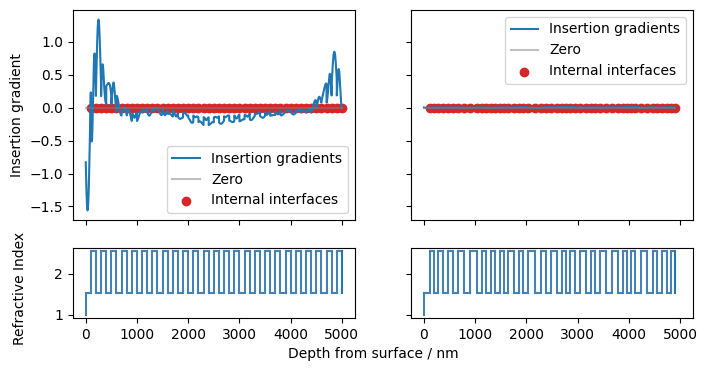

In [14]:

from working.analyze_utils.structure import plot_layer_thickness


def plot(film_before, film_before_insert, film, film_insert, target_reflect_spec, search_pts=200):
    film_before_insert = copy.deepcopy(film_before_insert)
    insert_idx = make_test_insert_film(film_before_insert, search_pts)
    grad = get_insert_grad(film_before_insert, [target_reflect_spec])

    fig, ((ax, ax_after), (s1, s2)) = plt.subplots(2, 2, sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 1]})
    
    ax.plot([film_before_insert.get_d()[:i].sum() for i in insert_idx], grad[insert_idx], label='Insertion gradients')
    ax.plot([0, film_before_insert.get_d().sum()], [0, 0], c='grey', alpha=0.5, label='Zero')
    ax.scatter([film_before.get_d().cumsum()], np.zeros_like(film_before.get_d().cumsum()), c='C3', alpha=1, label='Internal interfaces')
    ax.legend()
    film_insert = copy.deepcopy(film_insert)
    insert_idx = make_test_insert_film(film_insert, search_pts)
    grad = get_insert_grad(film_insert, [target_reflect_spec])

    ax_after.plot([film_insert.get_d()[:i].sum() for i in insert_idx], grad[insert_idx], label='Insertion gradients')
    ax_after.plot([0, film_insert.get_d().sum()], [0, 0], c='grey', alpha=0.5, label='Zero')
    ax_after.scatter([film.get_d().cumsum()], np.zeros_like(film.get_d().cumsum()), c='C3', alpha=1, label='Internal interfaces')
    ax_after.legend()

    # ax.set_xlabel('Depth from surface / nm')
    # ax_after.set_xlabel('Depth from surface / nm')
    ax.set_ylabel('Insertion gradient')
    
    plot_layer_thickness(film_before, 700., ax=s1)
    plot_layer_thickness(film, 700., ax=s2)
    fig.text(0.05, 0.05, 'Refractive Index', rotation='vertical')
    fig.text(0.5, 0.01, 'Depth from surface / nm', ha='center')
    fig.set_size_inches(8, 4)
    # fig.tight_layout()
    # fig.savefig('./images/needle_grad_before_vs_after_gd_w_structure.pdf', bbox_inches='tight')
plot(*films, target_reflect_spec)